In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

from plotnine import *
%matplotlib inline

In [2]:
#Import the data for the tutorial

df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How do we measure institutional differences and economic outcomes?



Economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates. (logpgp95)

institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the Political Risk Services Group.(avexpr)



# Question 1

Let's get a scatterplot going on. Let's plot a scatterplot that is relevant to the question of how predictive is the index of protection against exploitation to the log GDP per capita.

/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 52 rows containing missing values.


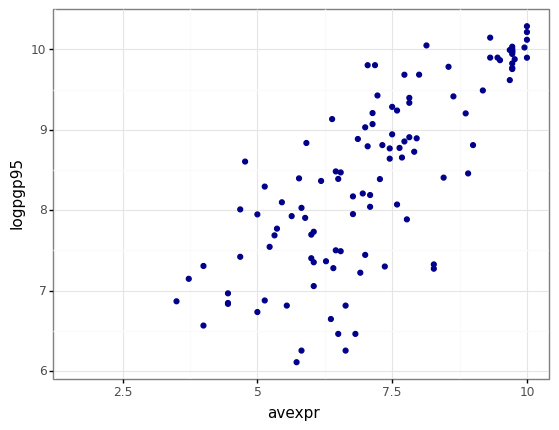

<ggplot: (8771846735806)>

In [3]:
(ggplot(data=df1, mapping=(aes(y='logpgp95', x='avexpr')))+
geom_point(color='darkblue')+
theme_bw())

# Question 2

Based on the plot above. Compute the regression we need to see the predictability. Print the summary, then print the coefficients on their own. Are they significant?

In [4]:
reg = smf.ols('logpgp95 ~ avexpr',df1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.16e-24
Time:                        17:24:14   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.301     15.391      0.000       4.030       5.222
avexpr         0.5319      0.041     13.093      0.000       0.451       0.612
==============================================================================
Omnibus:                        9.251   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.170
Skew:                          -0.680   Prob(JB):                       0.0102
Kurtosis:                       3.362   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
reg.params

Intercept    4.626089
avexpr       0.531871
dtype: float64

# Question 3

Make a plot of the regression line and the scatterplot. How well do we think the regression line fits the data?

In [6]:
#make df without na

df2=df1[['logpgp95', 'avexpr']].dropna()

In [14]:
df2.shape[0]

111

In [7]:
df2['preds_reg']=reg.predict(df2['avexpr'])

In [8]:
df2.head()

,logpgp95,avexpr,preds_reg
1,7.770645,5.363636,7.478854
2,9.804219,7.181818,8.445893
3,9.133459,6.386364,8.022813
5,9.897972,9.318182,9.582163
6,9.974877,9.727273,9.799747


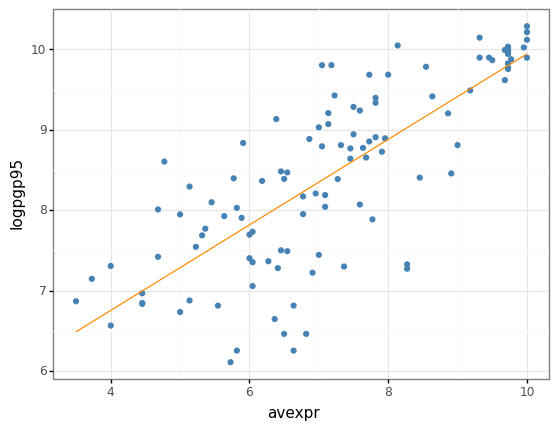

<ggplot: (8771816400246)>

In [9]:
(ggplot(df2, aes(x='avexpr', y='logpgp95'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='avexpr', y='preds_reg'), color='darkorange' )+
 theme_bw()
       )